<a href="https://colab.research.google.com/github/reidnersousa/IFB_OPT3_Machine-Learning_2023-2/blob/main/aula09_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


url ='https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'


dataset = pd.read_csv(url )

dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


separando os dados

In [ ]:
dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values



transformando os dados

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np
encoder = OneHotEncoder()

y =  encoder.fit_transform(y[:,np.newaxis]).toarray()


Padronizando

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


NameError: ignored

treinando o modelo

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2,random_state = 0)

Definindo o modelo da arquitetura

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
classifier = Sequential()


criando a camada de entrada  a oculta e  a saida

In [ ]:
classifier.add(Dense(8,input_dim=X.shape[1],activation ='relu'))
classifier.add(Dense(y.shape[1],activation='softmax'))

compilando a rede

In [ ]:

### utilizamos  o categorical_crossentropy por conta de que temos multi-classe de classificaçoes
### binary_crossentropy e utizando quando tem apenas duas classe de classificação
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy',metrics = ['accuracy'])


treinando a rede

In [ ]:
historico = classifier.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=10)


Epoch 1/100
12/12 [==============================] - 1s 16ms/step - loss: 1.2540 - accuracy: 0.2250 - val_loss: 1.1578 - val_accuracy: 0.3333
Epoch 2/100
12/12 [==============================] - 0s 4ms/step - loss: 1.2059 - accuracy: 0.2750 - val_loss: 1.1164 - val_accuracy: 0.4000
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 1.1657 - accuracy: 0.3167 - val_loss: 1.0779 - val_accuracy: 0.4333
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: 1.1253 - accuracy: 0.3667 - val_loss: 1.0447 - val_accuracy: 0.5333
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: 1.0876 - accuracy: 0.4167 - val_loss: 1.0158 - val_accuracy: 0.6333
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 1.0521 - accuracy: 0.4417 - val_loss: 0.9864 - val_accuracy: 0.6667
Epoch 7/100
12/12 [==============================] - 0s 6ms/step - loss: 1.0192 - accuracy: 0.4833 - val_loss: 0.9596 - val_accuracy: 0.6667
Epoch 8/100


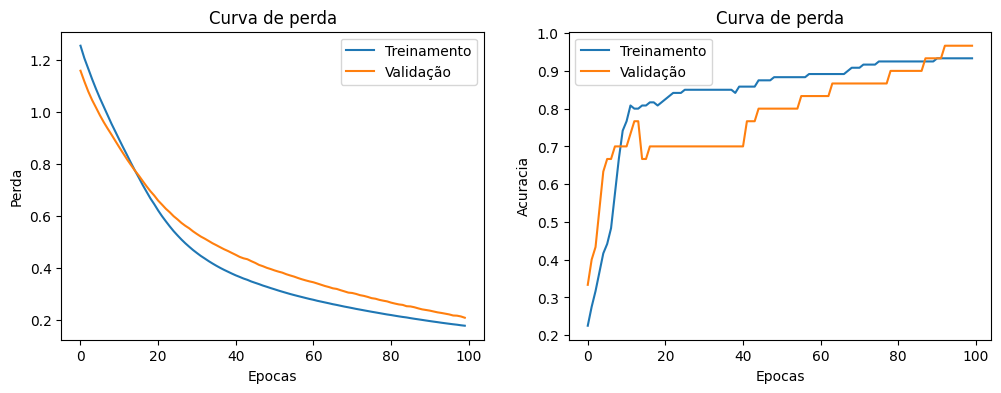

In [ ]:
perdas =historico.history['loss']
val_perdas = historico.history['val_loss']
acuracia = historico.history['accuracy']
val_acuracia = historico.history['val_accuracy']
import matplotlib.pyplot as plt

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(perdas,label="Treinamento")
plt.plot(val_perdas,label="Validação")
plt.title("Curva de perda")
plt.xlabel('Epocas')
plt.ylabel('Perda')
plt.legend()

plt.subplot(1,2,2)
plt.plot(acuracia,label="Treinamento")
plt.plot(val_acuracia,label="Validação")
plt.title("Curva de perda")
plt.xlabel('Epocas')
plt.ylabel('Acuracia')
plt.legend()

plt.show()

testando a rede

In [ ]:
y_pred = classifier.predict(X_test)

1/1 [==============================] - 0s 19ms/step


convertendo para 0 e 1

In [ ]:
y_pred = (y_pred > 0.5)
print(y_pred)

[[False False  True]
 [False  True False]
 [ True False False]
 [False False  True]
 [ True False False]
 [False False  True]
 [ True False False]
 [False False False]
 [False  True False]
 [False  True False]
 [False False  True]
 [False  True False]
 [False  True False]
 [False  True False]
 [False  True False]
 [ True False False]
 [False  True False]
 [False  True False]
 [ True False False]
 [ True False False]
 [False False  True]
 [False  True False]
 [ True False False]
 [ True False False]
 [False False  True]
 [ True False False]
 [ True False False]
 [False  True False]
 [False  True False]
 [ True False False]]


matriz confusão

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
 ### [0,0] fez 11 previsões para classe 0
 ### [1,1] fez 12 previsões para classe 1
 ##  [2,2] fez 6  previsões para classe 2
cm

array([[11,  0,  0],
       [ 1, 12,  0],
       [ 0,  0,  6]])